In [1]:
from data.particle_clouds.jets import JetDataModule
from pipeline.configs import ExperimentConfigs

config = ExperimentConfigs("config.yaml")
raw_jets = JetDataModule(config, preprocess=False)
jets = JetDataModule(config)


In [4]:
jets.target

In [2]:
raw_jets.setup("fit")
jets.setup("fit")

INFO:  Setting up datasets for training...
INFO:  Setting up datasets for training...
INFO:  Preprocessing source/target fit datasets...


/home/df630/Multimodal-Bridges/multimodal_bridges/data/particle_clouds/particles.py:134: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.continuous = (self.continuous - torch.tensor(mean)) / (
/home/df630/Multimodal-Bridges/multimodal_bridges/data/particle_clouds/particles.py:135: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(std)


In [5]:
def get_flavor_counts(tensor):
    mask = tensor.mask_bool
    jet_flavors = tensor.discrete[mask]
    for i in range(8):
        print(i, len(jet_flavors[jet_flavors == i]))


get_flavor_counts(jets.target)


0 154312
1 38183
2 142701
3 146611
4 665
5 742
6 471
7 542


In [11]:
import torch

torch.randint(0, 8, (100,))

tensor([1, 6, 5, 1, 0, 2, 5, 7, 1, 3, 7, 2, 7, 3, 2, 2, 1, 2, 4, 6, 0, 3, 2, 3,
        5, 6, 7, 0, 3, 4, 3, 0, 7, 6, 3, 1, 1, 0, 6, 0, 1, 5, 1, 6, 7, 6, 0, 7,
        6, 7, 6, 6, 6, 3, 6, 0, 0, 2, 6, 5, 3, 6, 1, 6, 6, 2, 2, 7, 1, 7, 2, 1,
        4, 2, 3, 4, 4, 0, 6, 5, 5, 0, 4, 2, 1, 5, 0, 6, 6, 1, 3, 3, 0, 6, 1, 3,
        3, 4, 0, 0])

In [7]:
def get_one_hot_flavor_counts(tensor):
    isPhoton = (tensor.discrete[..., 0] == 1) & (tensor.discrete[..., -1] == 0)
    isNeutralHadron = (tensor.discrete[..., 1] == 1) & (tensor.discrete[..., -1] == 0)
    isNegativeHadron = (tensor.discrete[..., 2] == 1) & (tensor.discrete[..., -1] == -1)
    isPositiveHadron = (tensor.discrete[..., 2] == 1) & (tensor.discrete[..., -1] == 1)
    isElectron = (tensor.discrete[..., 3] == 1) & (tensor.discrete[..., -1] == -1)
    isPositron = (tensor.discrete[..., 3] == 1) & (tensor.discrete[..., -1] == 1)
    isMuon = (tensor.discrete[..., 4] == 1) & (tensor.discrete[..., -1] == -1)
    isAntiMuon = (tensor.discrete[..., 4] == 1) & (tensor.discrete[..., -1] == 1)

    flavors = {
        0: isPhoton,
        1: isNeutralHadron,
        2: isNegativeHadron,
        3: isPositiveHadron,
        4: isElectron,
        5: isPositron,
        6: isMuon,
        7: isAntiMuon,
    }

    for i in range(8):
        print(i, tensor.discrete[flavors[i]].shape[0])


get_one_hot_flavor_counts(raw_jets.target)

0 154307
1 38186
2 142701
3 146613
4 665
5 742
6 471
7 542


In [8]:
get_one_hot_flavor_counts(raw_jets.source)

0 96213
1 95997
2 48320
3 48365
4 48575
5 48441
6 48197
7 48470


<Axes: ylabel='Count'>

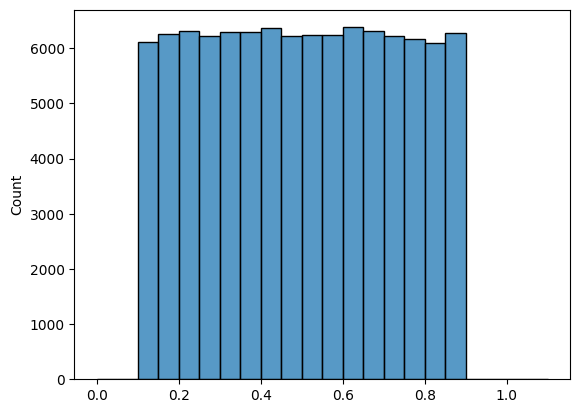

In [56]:
from torch.distributions.uniform import Uniform
import seaborn as sns

low = 0.1  # range of uniform distribution

x = Uniform(low, 1 - low).sample((100000,))
sns.histplot(x, fill=True, binwidth=0.05, binrange=(low - 0.1, high + 0.1))


In [55]:
x

tensor([0.7417, 0.7380, 0.7873,  ..., 0.6568, 0.8176, 0.6528])

In [1]:
import torch
from torch.distributions.categorical import Categorical
from data.particle_clouds.jets import JetDataModule
from pipeline.configs import ExperimentConfigs

config = ExperimentConfigs("config.yaml")

def aoj_multimodal_noise(shape, config):
    """
    Sample multi-modal random source:
    - time: None
    - continuous: N(0, 1) for each particle feature
    - discrete: random token in [0, vocab_size) for each particle
    - mask: number of active particles from a categorical distribution with `categorial_probs`

    """

    num_jets, max_num_particles = shape
    vocab_size = config.data.vocab_size
    categorial_probs = [
        0.0,
        0.0,
        2.3e-05,
        4.2e-05,
        4.5e-05,
        7.6e-05,
        0.000126,
        0.000139,
        0.000295,
        0.000411,
        0.000711,
        0.001076,
        0.001498,
        0.002125,
        0.002676,
        0.003562,
        0.004589,
        0.005568,
        0.006726,
        0.00745,
        0.008848,
        0.009891,
        0.010794,
        0.011616,
        0.012913,
        0.014028,
        0.014461,
        0.01527,
        0.016087,
        0.017046,
        0.017625,
        0.018257,
        0.018313,
        0.018739,
        0.019904,
        0.01987,
        0.020017,
        0.020573,
        0.020321,
        0.020915,
        0.021078,
        0.021068,
        0.021238,
        0.021362,
        0.021184,
        0.020843,
        0.021087,
        0.020803,
        0.020675,
        0.02012,
        0.019687,
        0.019767,
        0.019179,
        0.018818,
        0.018088,
        0.017954,
        0.017493,
        0.01666,
        0.015898,
        0.015648,
        0.015328,
        0.014447,
        0.013704,
        0.0133,
        0.012902,
        0.011917,
        0.011454,
        0.010991,
        0.010148,
        0.009768,
        0.009205,
        0.008871,
        0.008108,
        0.007705,
        0.007257,
        0.006812,
        0.006552,
        0.005785,
        0.005534,
        0.004937,
        0.004508,
        0.004359,
        0.003957,
        0.003599,
        0.003272,
        0.003055,
        0.002747,
        0.002811,
        0.002423,
        0.002255,
        0.001991,
        0.001862,
        0.001687,
        0.001502,
        0.001489,
        0.001202,
        0.001192,
        0.001114,
        0.0009,
        0.000844,
        0.000768,
        0.000693,
        0.000636,
        0.000547,
        0.000447,
        0.000453,
        0.000381,
        0.000422,
        0.000332,
        0.000267,
        0.000254,
        0.000234,
        0.000208,
        0.000167,
        0.000152,
        0.000135,
        0.000108,
        9.5e-05,
        0.000117,
        9.9e-05,
        9.4e-05,
        8e-05,
        5e-05,
        6.3e-05,
        2.7e-05,
        3.2e-05,
        4.9e-05,
        4.3e-05,
        0.000277,
    ]

    time = None
    continuous = torch.randn((num_jets, max_num_particles, 3))

    if vocab_size:
        discrete = torch.randint(0, vocab_size, (num_jets, max_num_particles, 1))
    else:
        discrete = None

    if categorial_probs:
        cat = Categorical(categorial_probs)
        multiplicity = cat.sample((num_jets,))
        mask = torch.zeros((num_jets, max_num_particles, 1))
        for i, n in enumerate(multiplicity):
            mask[i, :n] = 1
    else:
        mask = torch.ones((num_jets, max_num_particles, 1)).long()

    return time, continuous, discrete, mask

In [2]:
from data.dataclasses import MultiModeState
from data.particle_clouds.particles import ParticleClouds, MultiModalNoise
shape = torch.Size([10, 100])

from pipeline.configs import ExperimentConfigs

config = ExperimentConfigs("config.yaml")


In [3]:
noise_dist = MultiModalNoise(config)

In [4]:
sample = MultiModeState.sample_from(noise_dist, shape = (100000,128))
noise = ParticleClouds(sample)

In [5]:
noise

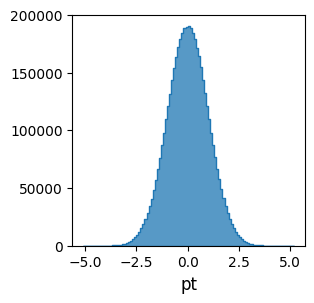

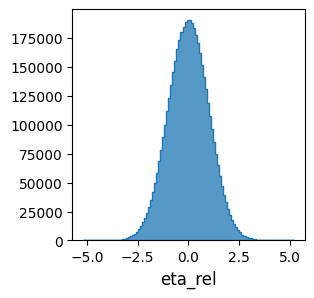

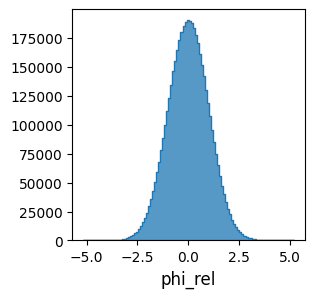

In [6]:
import seaborn as sns

noise.histplot("pt", fill=True, binwidth=0.1),
noise.histplot("eta_rel", fill=True, binwidth=0.1),
noise.histplot("phi_rel", fill=True, binwidth=0.1)

<Axes: ylabel='Density'>

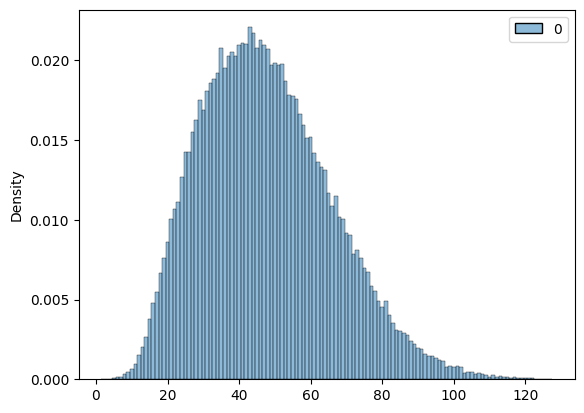

In [8]:
sns.histplot(noise.multiplicity, fill=True, binwidth=(0,128), discrete=True, stat="density")

In [9]:
(len(noise.discrete[noise.discrete==0]),len(noise.discrete[noise.discrete==1]), len(noise.discrete[noise.discrete==2]), len(noise.discrete[noise.discrete==3]),
len(noise.discrete[noise.discrete==4]),len(noise.discrete[noise.discrete==5]), len(noise.discrete[noise.discrete==6]), len(noise.discrete[noise.discrete==7])

(8626581, 597373, 596146, 596158, 595728, 594826, 596973, 596215)

In [10]:
noise.discrete

tensor([[[5],
         [7],
         [3],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [4],
         [6],
         ...,
         [0],
         [0],
         [0]],

        [[1],
         [6],
         [4],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[3],
         [3],
         [4],
         ...,
         [0],
         [0],
         [0]],

        [[5],
         [6],
         [2],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [2],
         [3],
         ...,
         [0],
         [0],
         [0]]])